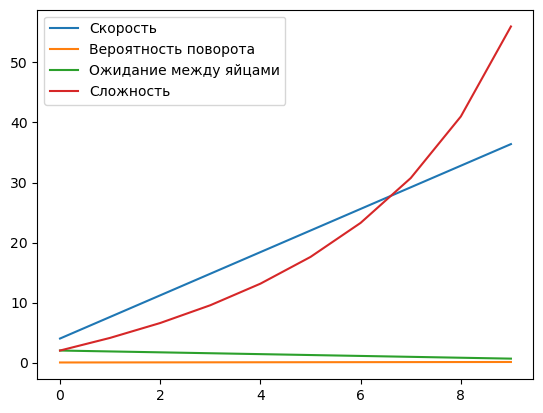

C:\Users\timom\AppData\Local\Temp\ipykernel_28336\1699379340.py:36: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sh.sheet1.update(('A' + str(i+1)), str(i+1))
C:\Users\timom\AppData\Local\Temp\ipykernel_28336\1699379340.py:37: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sh.sheet1.update(('B' + str(i+1)), str(speeds[i]))
C:\Users\timom\AppData\Local\Temp\ipykernel_28336\1699379340.py:38: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature

In [17]:
import gspread
import numpy as np
import matplotlib.pyplot as plt
import time

def lerp(a, b, dist):
    return a*(1-dist) + b*dist 

LEVEL_COUNT = 10 # количество уровней
START_SPEED = 4 # скорость дракона
END_SPEED = 40
START_TURNFREQ = 0.01 # вероятность поворота
END_TURNFREQ = START_TURNFREQ * (END_SPEED / START_SPEED) # для простоты мы делаем вероятность поворота прямо пропорциональным скорости
START_EGGDELAY = 2 # время ожидания между падением яиц
END_EGGDELAY = 0.5

gc = gspread.service_account(filename='unitydatascience-445819-53faf670fe6e.json')
sh = gc.open("UnityWorkshop3")

level = list(range(LEVEL_COUNT))
lerp_dists = [i*0.1 for i in level]
speeds = [lerp(START_SPEED, END_SPEED, i) for i in lerp_dists] # линейно рассчитываем переменные для каждого уровня
turnfreqs = [lerp(START_TURNFREQ, END_TURNFREQ, i) for i in lerp_dists]
eggdelays = [lerp(START_EGGDELAY, END_EGGDELAY, i) for i in lerp_dists] 
difficulties = [speeds[i] / eggdelays[i] for i in level] # вычисляем сложность как прямо пропорциальную скорости и обратно пропорциональную времени ожидания между яйцами

plt.plot(level, speeds, label="Скорость")
plt.plot(level, turnfreqs, label="Вероятность поворота")
plt.plot(level, eggdelays, label="Ожидание между яйцами")
plt.plot(level, difficulties, label="Сложность")

plt.legend(["Скорость", "Вероятность поворота", "Ожидание между яйцами", "Сложность"])
plt.show() # все переменные возрастают линейно, а сложность - квадратично

for i in level:
    sh.sheet1.update(('A' + str(i+1)), str(i+1))
    sh.sheet1.update(('B' + str(i+1)), str(speeds[i]))
    sh.sheet1.update(('C' + str(i+1)), str(turnfreqs[i]))
    sh.sheet1.update(('D' + str(i+1)), str(eggdelays[i]))
    sh.sheet1.update(('E' + str(i+1)), str(difficulties[i]))
    time.sleep(1) # ограничивает частоту обращений по API